In [30]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import PillowWriter

In [23]:
bbox_path = "data/8.477_47.336_8.605_47.417"
df = pd.read_csv(bbox_path + "/evolution.csv")
df["time_stamp"] = df["time_stamp"].str[:10]
df["time_stamp"] = pd.to_datetime(df["time_stamp"], format='%Y-%m-%d')
df = df.set_index('time_stamp')
df

,cloud_coverage_api,cloud_coverage_calculated,buildup_pct,green_pct,water_pct,empty_pct
time_stamp,,,,,,
2020-04-14,5.05,0.0,33.579833,55.210779,5.760626,5.448762
2020-04-11,2.44,0.0,36.063123,51.537456,5.889055,6.510366
2020-04-09,7.11,0.0,42.734485,47.045921,5.900908,4.318686
2020-04-06,2.34,0.0,42.914929,46.657644,5.820583,4.606844
2020-04-04,2.13,0.0,38.053645,49.191225,5.813563,6.941567
2020-04-01,4.39,0.0,37.920384,49.750624,5.789626,6.539366
2020-03-25,5.09,0.0,39.199487,48.407882,5.773055,6.619576
2020-03-15,0.51,0.0,36.124230,50.464574,5.583405,7.827791


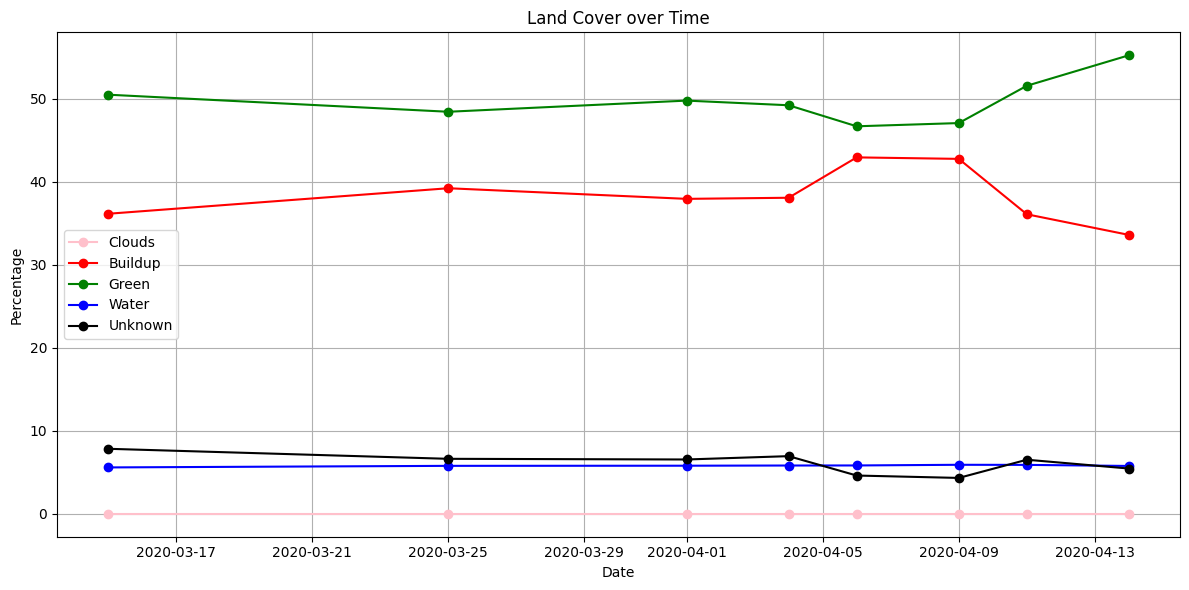

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["cloud_coverage_calculated"], label="Clouds", color="pink", marker="o")
plt.plot(df.index, df["buildup_pct"], label="Buildup", color="red", marker="o")
plt.plot(df.index, df["green_pct"], label="Green", color="green", marker="o")
plt.plot(df.index, df["water_pct"], label="Water", color="blue", marker="o")
plt.plot(df.index, df["empty_pct"], label="Unknown", color="black", marker="o")

plt.xlabel("Date")
plt.ylabel("Percentage")
plt.title("Land Cover over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

GIF saved as 'animation.gif'


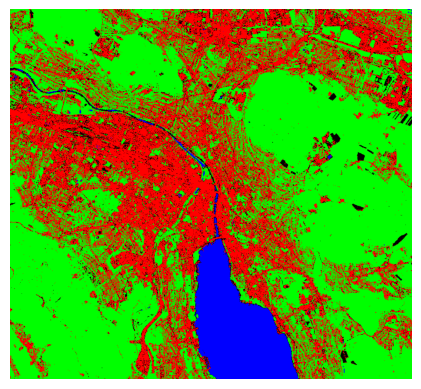

In [32]:
# Load all numpy arrays from the directory
npy_files = [f for f in os.listdir(bbox_path) if f.endswith('.npy')]
npy_arrays = [np.load(os.path.join(bbox_path, f)) for f in npy_files]

# Set up a figure for plotting
fig, ax = plt.subplots()

# Create a PillowWriter for GIF output
writer = PillowWriter(fps=100)  # Adjust fps as needed

# Create the animation
with writer.saving(fig, "animation.gif", dpi=100):
    for array in npy_arrays:
        ax.clear()  # Clear the previous frame
        ax.imshow(array, cmap='gray')  # Adjust according to the type of array (e.g., 2D for images)
        ax.set_axis_off()  # Turn off axes if it's an image-like array
        writer.grab_frame()

print("GIF saved as 'animation.gif'")